Importing libraries.

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing and reading the dataset.

In [4]:
ds = pd.read_csv('churn_m.csv')

Exploring the dataset.

In [5]:
ds

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,NaN,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,NaN,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,NaN,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,NaN,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771.0,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792.0,France,Female,28,4,130142.79,1,1,0,38190.78,0


Checking for missing values in dataset.

In [11]:
ds.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        2
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
ds.shape

(10000, 14)

Replacing the null values with mean of the column.

In [16]:
ds.fillna(ds['CreditScore'].mean(),inplace = True) 

In [17]:
ds.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

Converitng object columns to categorical labels.

In [21]:
le = LabelEncoder()

In [22]:
ds['Gender'] = le.fit_transform(ds['Gender'])
ds['Geography'] = le.fit_transform(ds['Geography'])

In [23]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.00000,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,650.54791,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,650.54791,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.00000,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.00000,2,0,43,2,125510.82,1,1,1,79084.10,0


In [24]:
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771.0,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516.0,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709.0,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772.0,1,1,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792.0,0,0,28,4,130142.79,1,1,0,38190.78,0


Seperating independant and dependant data.

In [27]:
x = ds.iloc[:,3:13]
y = ds.iloc[:,13]

Peroforming one hot encoding.

In [31]:
x = pd.get_dummies(x,columns=['Geography'],drop_first=True)

In [36]:
x1 = x.copy()

In [42]:
x.rename(columns={'Geography_1':'Germany','Geography_2':'Spain'},inplace =True)

In [47]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619.00000,0,42,2,0.00,1,1,1,101348.88,0,0
1,650.54791,0,41,1,83807.86,1,0,1,112542.58,0,1
2,650.54791,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699.00000,0,39,1,0.00,2,0,0,93826.63,0,0
4,850.00000,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.00000,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516.00000,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709.00000,0,36,7,0.00,1,0,1,42085.58,0,0
9998,772.00000,1,42,3,75075.31,2,1,0,92888.52,1,0


Visualizing the data to check any collinearity exist between them.

Text(0, 0.5, 'Balance')

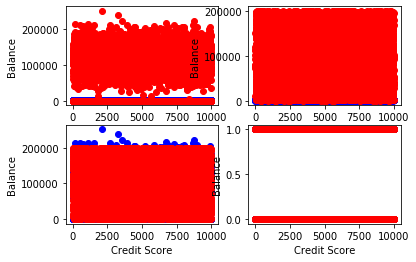

In [194]:
plt.subplot(2,2,1)
plt.plot(x['CreditScore'],"o",color='blue')
plt.plot(x['Balance'],"o",color='red')
plt.xlabel('Credit Score')
plt.ylabel('Balance')

plt.subplot(2,2,2)
plt.plot(x['CreditScore'],"o",color='blue')
plt.plot(x['EstimatedSalary'],"o",color='red')
plt.xlabel('Credit Score')
plt.ylabel('Balance')

plt.subplot(2,2,3)
plt.plot(x['Balance'],"o",color='blue')
plt.plot(x['EstimatedSalary'],"o",color='red')
plt.xlabel('Credit Score')
plt.ylabel('Balance')

plt.subplot(2,2,4)
plt.plot(x['HasCrCard'],"o",color='blue')
plt.plot(x['IsActiveMember'],"o",color='red')
plt.xlabel('Credit Score')
plt.ylabel('Balance')




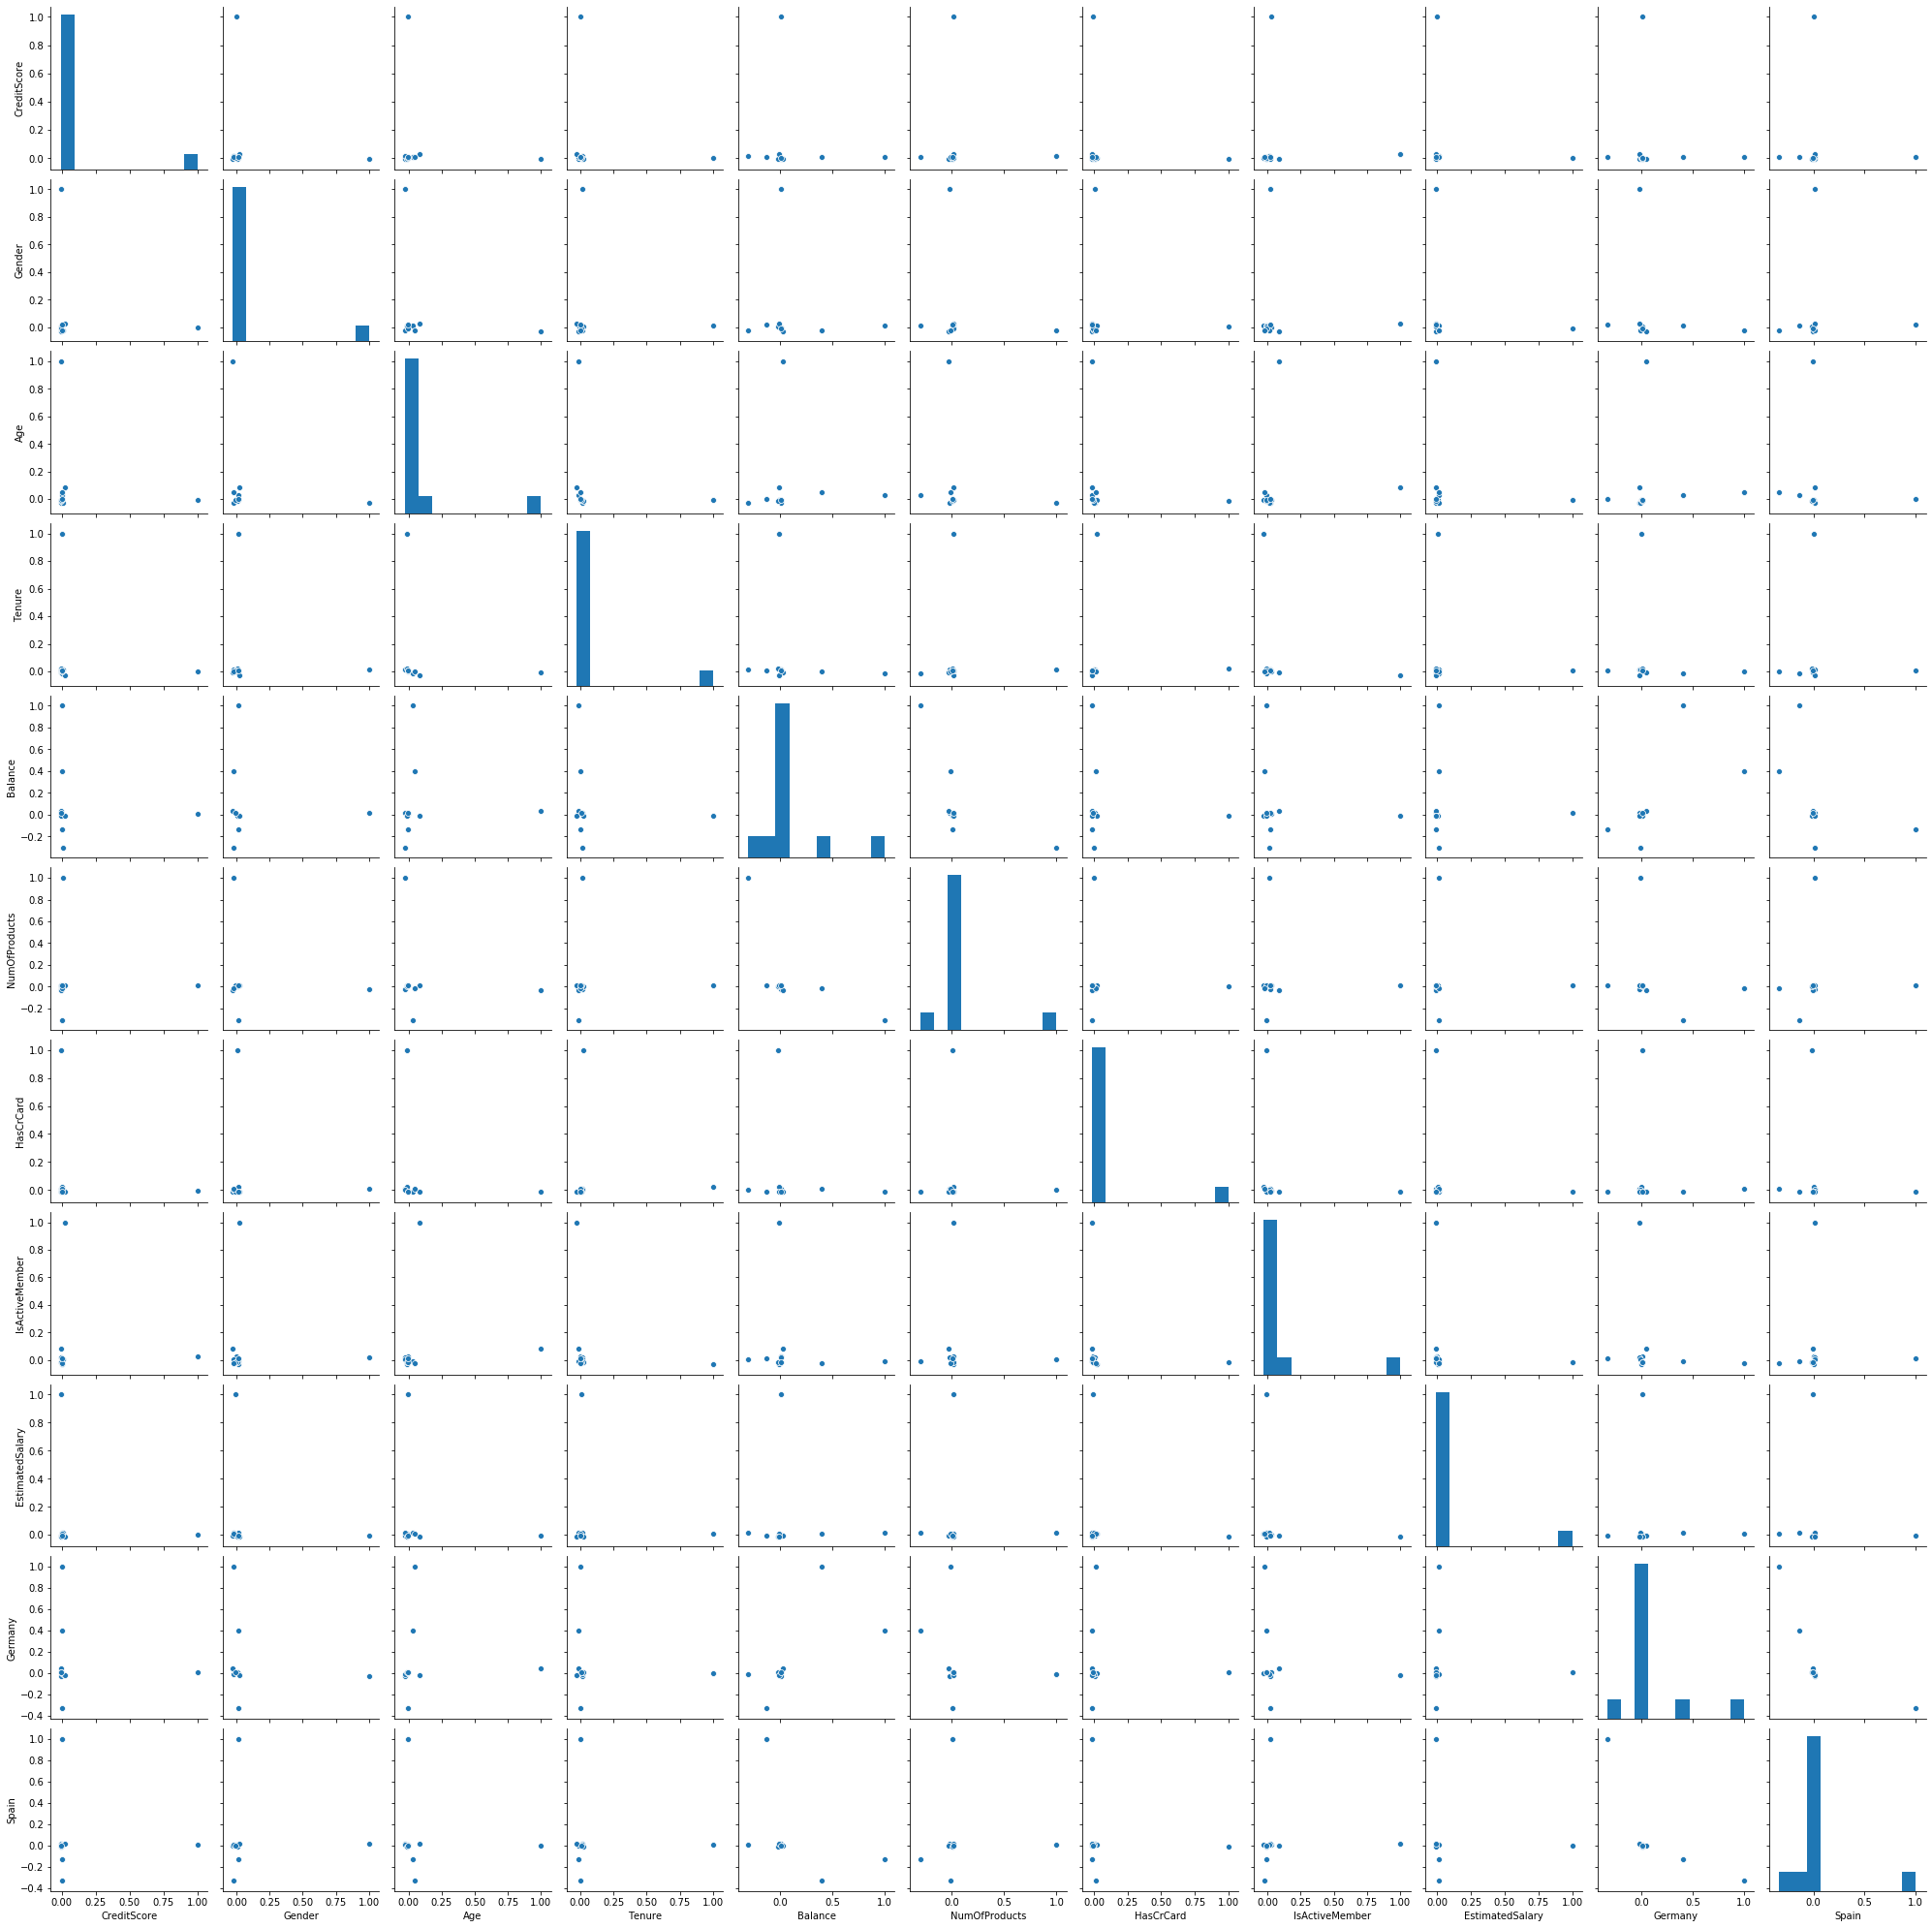

In [61]:
sns.pairplot(x.corr())

Visualizing the data through heatmap.

Text(0.5, 1, 'Relation between the input data')

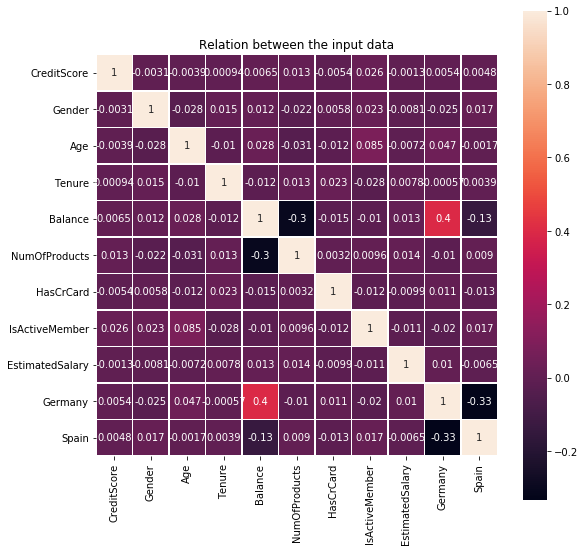

In [60]:
plt.figure(figsize=(9,9))
sns.heatmap(x.corr(),annot=True,linewidths=.5,square = True)
plt.title('Relation between the input data')

Splitting the data for training and testing.

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
print(x_train.shape,x_test.shape)

(8000, 11) (2000, 11)


In [51]:
print(y_train.shape,y_test.shape)

(8000,) (2000,)


Scaling the data within a range of values.

In [46]:
se = StandardScaler()

In [64]:
x_train = se.fit_transform(x_train)
x_test = se.fit_transform(x_test)

Initializing the model.

In [143]:
rf = RandomForestClassifier(n_estimators=50)

Training the model.

In [144]:
model = rf.fit(x_train,y_train)

Checking the model score.

In [145]:
model.score(x_test,y_test)

0.8665

Making predictions

In [150]:
y_pred = model.predict(x_test)

In [ ]:
Checking the accuracy of model.

In [153]:
print(accuracy_score(y_test,y_pred))

0.8665


Checking evaluation results confusion matrix.

In [155]:
cf= confusion_matrix(y_test,y_pred)

Text(33.0, 0.5, 'Actual')

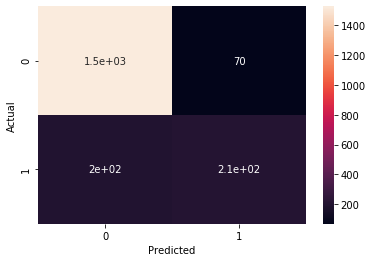

In [156]:
sns.heatmap(cf,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [164]:
actual = y_test.values.flatten()
predict = y_pred.flatten()

In [ ]:
Comparing the predicted and actual data.

In [166]:
compare =pd.DataFrame({'actual':actual,'predicted':predict})

In [167]:
compare

,actual,predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,0,0


In [ ]:
Visualizing the compared data.

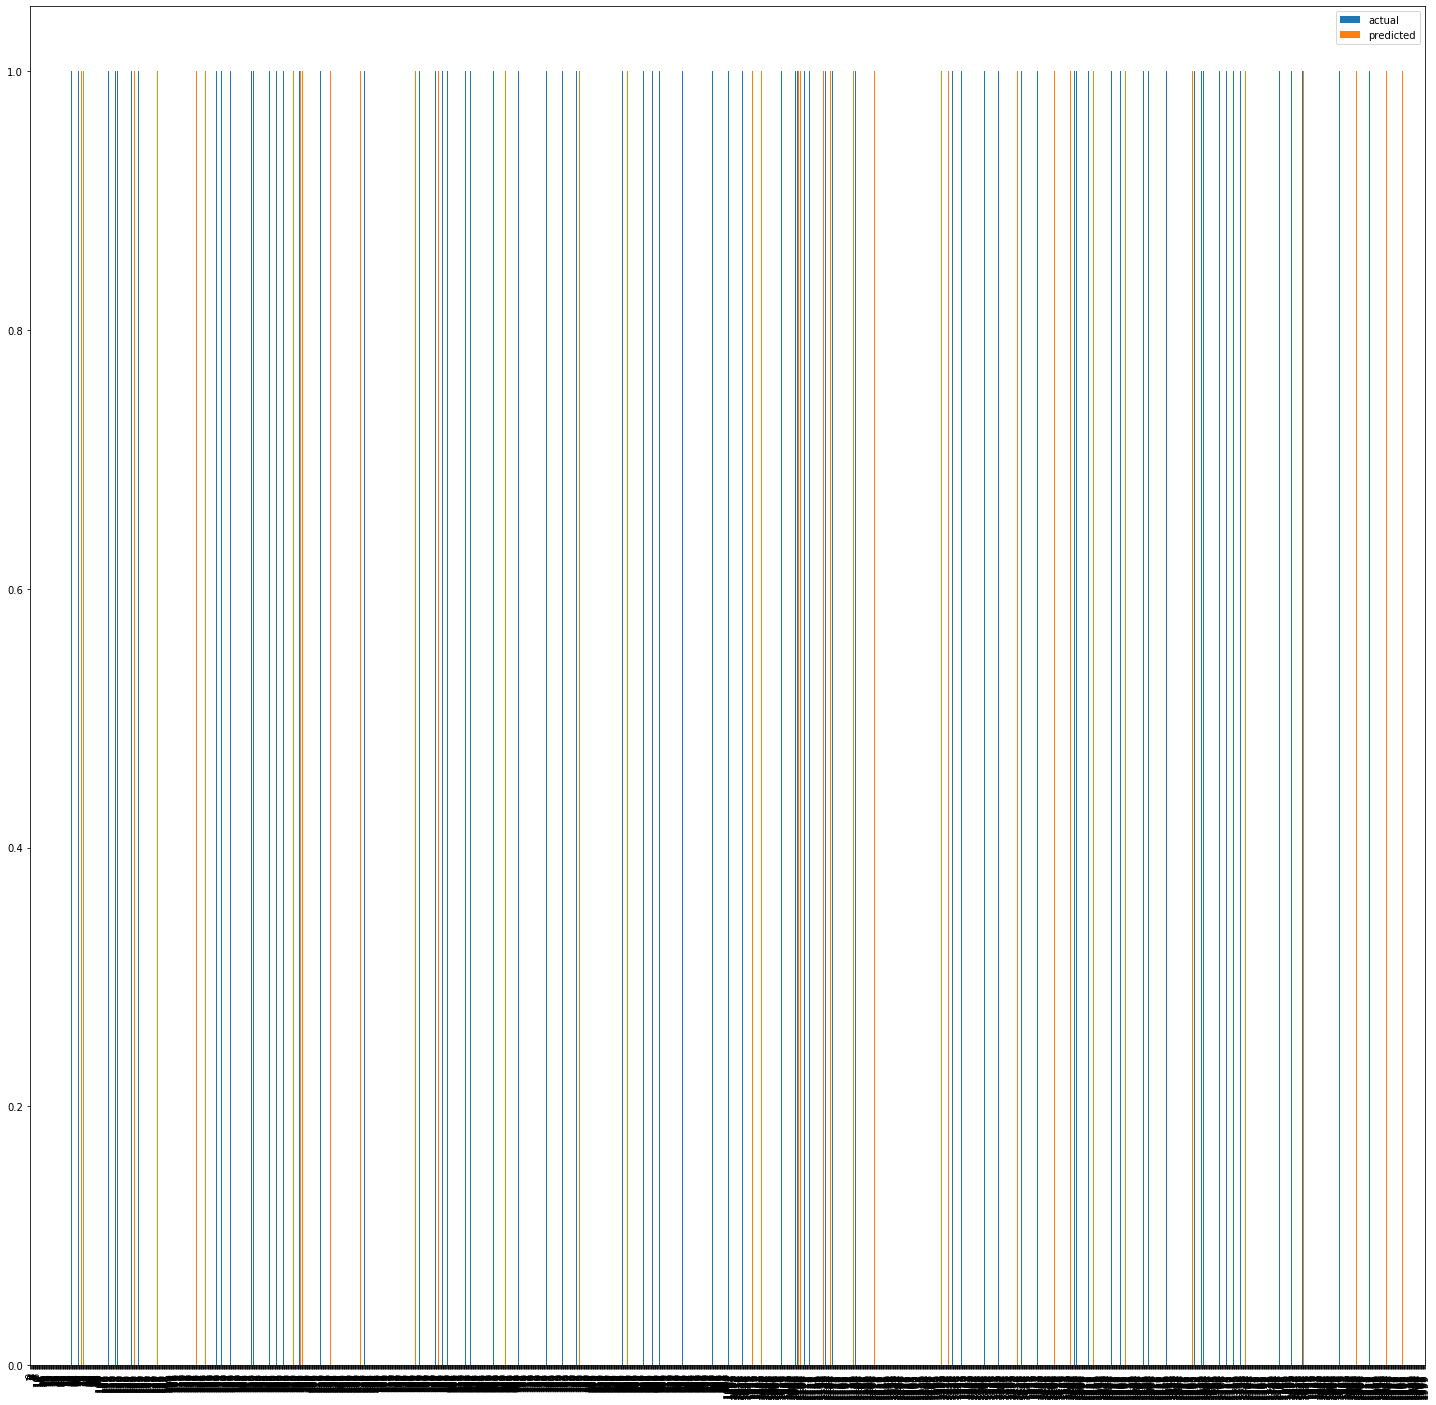

In [182]:
#plt.figure(figsize=(45,45))
compare.plot.bar(figsize=(25,25))

To improve the model accuracy use ANN or hyper parameter tuning.